# Pandas: Data Visualization su matplotlib

Faile pateikiami aiškūs ir nuoseklūs pavyzdžiai, kaip naudojant `pandas` ir `matplotlib`:

- kurti grafikus iš Series ir DataFrame
- naudoti `plot()` metodą
- formatuoti grafikus (pavadinimai, ašys, dydis)
- suprasti spalvų ir paletių principus
- kurti dažniausiai naudojamus grafikus
- dirbti su keliais grafikais (subplots – konceptualiai)
- išsaugoti grafikus į failus

Pavyzdžiai orientuoti į duomenų analitikos kontekstą (pardavimai, laikas, palyginimai).
Komentarai pateikiami techniniu, aiškinamuoju stiliumi.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.__version__


'2.3.3'

## 1. Pavyzdiniai duomenys

Naudojamas paprastas pardavimų rinkinys:
- data
- regionas
- kanalas
- pajamos

Duomenys sukurti demonstravimui, kad būtų lengva sekti logiką.


In [2]:
sales = pd.DataFrame({
    "date": pd.to_datetime([
        "2025-01-01","2025-01-02","2025-01-03","2025-01-04","2025-01-05",
        "2025-01-06","2025-01-07","2025-01-08"
    ]),
    "region": ["North","North","South","South","North","South","North","South"],
    "revenue": [1200, 1500, 900, 1100, 1600, 1000, 1700, 1300]
})

sales


,date,region,revenue
0,2025-01-01,North,1200
1,2025-01-02,North,1500
2,2025-01-03,South,900
3,2025-01-04,South,1100
4,2025-01-05,North,1600
5,2025-01-06,South,1000
6,2025-01-07,North,1700
7,2025-01-08,South,1300


## 2. Paprasčiausias grafikas su `plot()`

`plot()` yra aukšto lygio metodas, kuris automatiškai parenka grafiko tipą pagal duomenis.

Dažna klaida:
- bandyti piešti grafiką, kai indeksas ar reikšmės netinkamo tipo
- pamiršti, kad be `plt.show()` kai kuriose aplinkose grafikas nebus parodytas


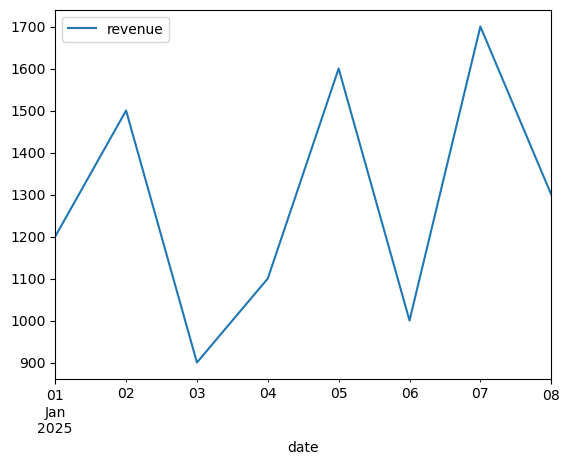

In [ ]:
sales.plot(x="date", y="revenue")
plt.show()


## 3. Grafiko formatavimas

Grafiko aiškumas yra kritinis analitikos kontekste.

Geroji praktika:
- visada nurodyti pavadinimą
- aprašyti ašis
- vengti perteklinės informacijos


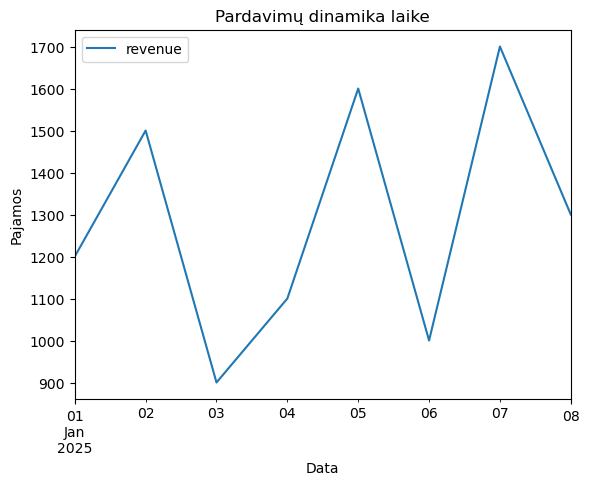

In [4]:
sales.plot(x="date", y="revenue")
plt.title("Pardavimų dinamika laike")
plt.xlabel("Data")
plt.ylabel("Pajamos")
plt.show()


## 4. Series vizualizavimas

`Series` taip pat turi `plot()` metodą.
Tai naudinga, kai analizuojama viena metrika.


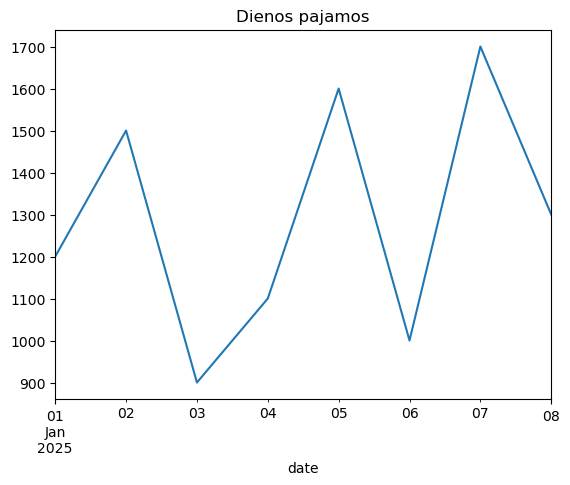

In [16]:
daily_revenue = sales.set_index("date")["revenue"]
daily_revenue.plot()
plt.title("Dienos pajamos")
plt.show()


## 5. Spalvos ir spalvų paletės (konceptas)

Pagal nutylėjimą `matplotlib` naudoja numatytą spalvų ciklą.
Dažna klaida:
- naudoti per daug ryškių ar nenuoseklių spalvų
- naudoti skirtingas spalvas tai pačiai kategorijai skirtinguose grafikuose

Geroji praktika:
- laikytis nuoseklumo
- naudoti spalvas tik tada, kai jos prideda informacinę vertę

Toliau pateikiami pavyzdžiai naudojant numatytą spalvų logiką.


## 6. Dažniausi grafikų tipai

Toliau pateikiami dažniausiai naudojami grafikai duomenų analitikoje.
Kiekvienas grafikas rodomas atskirai, kad būtų aiški jo paskirtis.


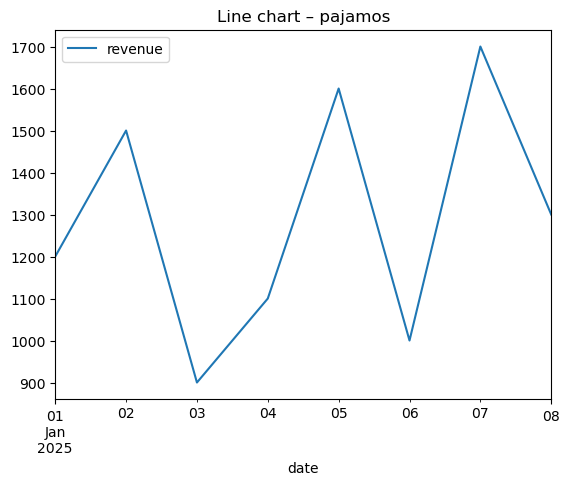

In [6]:
# Line chart – tendencijoms laike
sales.plot(x="date", y="revenue")
plt.title("Line chart – pajamos")
plt.show()


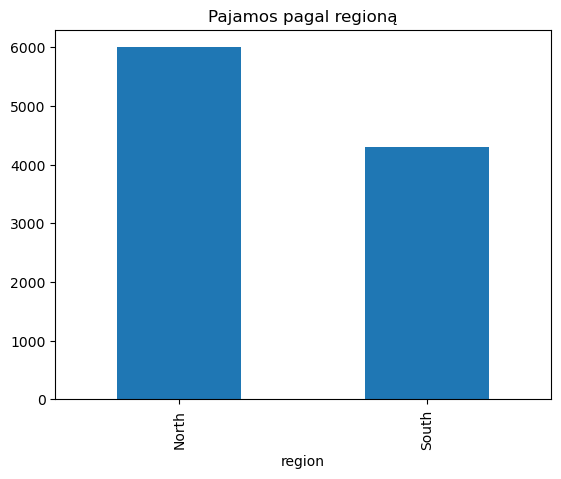

In [7]:
# Bar chart – kategorijų palyginimui
sales.groupby("region")["revenue"].sum().plot(kind="bar")
plt.title("Pajamos pagal regioną")
plt.show()


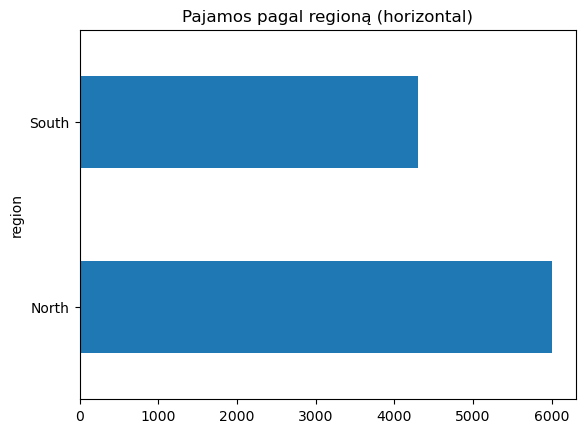

In [8]:
# Horizontal bar chart
sales.groupby("region")["revenue"].sum().plot(kind="barh")
plt.title("Pajamos pagal regioną (horizontal)")
plt.show()


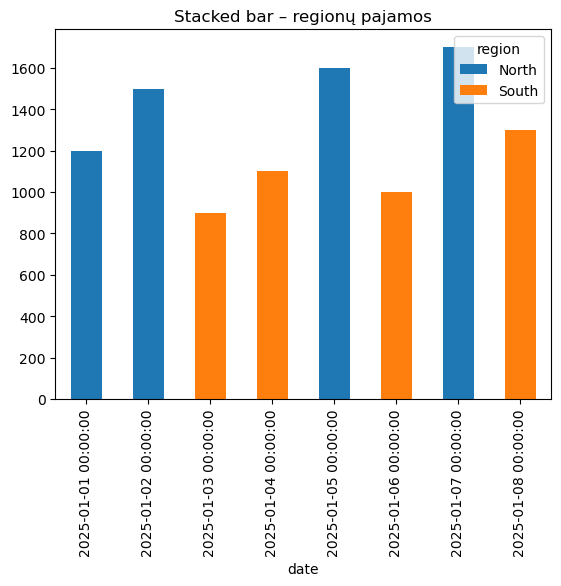

In [9]:
# Stacked bar chart (naudojamas atsargiai)
sales_pivot = sales.pivot_table(
    index="date",
    columns="region",
    values="revenue",
    aggfunc="sum",
    fill_value=0
)

sales_pivot.plot(kind="bar", stacked=True)
plt.title("Stacked bar – regionų pajamos")
plt.show()


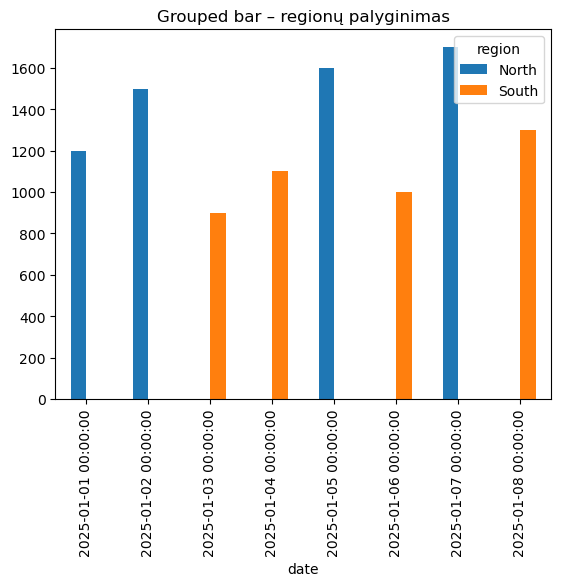

In [10]:
# Grouped bar chart
sales_pivot.plot(kind="bar")
plt.title("Grouped bar – regionų palyginimas")
plt.show()


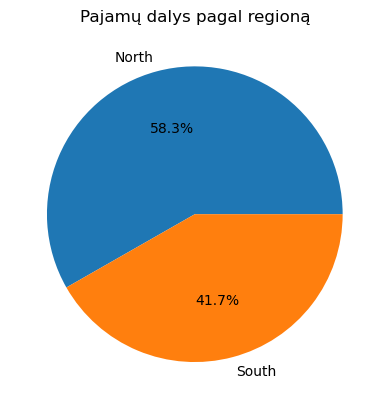

In [11]:
# Pie chart – naudoti tik labai apibendrintiems palyginimams
sales.groupby("region")["revenue"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Pajamų dalys pagal regioną")
plt.ylabel("")
plt.show()


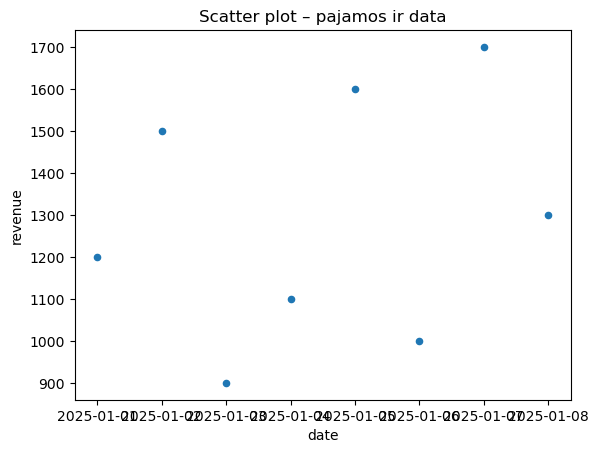

In [12]:
# Scatter plot – ryšiams tarp kintamųjų
sales.plot(kind="scatter", x="date", y="revenue")
plt.title("Scatter plot – pajamos ir data")
plt.show()


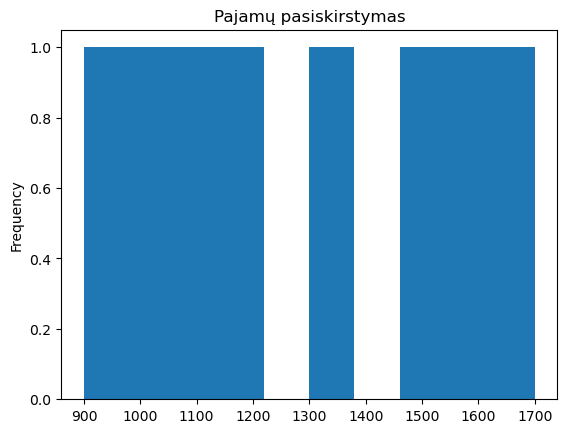

In [13]:
# Histogram – pasiskirstymui
sales["revenue"].plot(kind="hist")
plt.title("Pajamų pasiskirstymas")
plt.show()


## 7. Subplots (konceptas)

Subplots leidžia pateikti kelis grafikus viename paveiksle.
Dažna klaida:
- per daug grafikų viename lange
- per mažas dydis, dėl ko grafikai tampa neįskaitomi

Subplots naudoti tik tada, kai grafikai aiškiai susiję.

Žemiau pateikiamas pavyzdys paliktas kaip komentaras.


In [14]:
# Subplots pavyzdys (konceptinis)
# fig, axes = plt.subplots(2, 1, figsize=(8, 6))
# sales.plot(x="date", y="revenue", ax=axes[0])
# sales.groupby("region")["revenue"].sum().plot(kind="bar", ax=axes[1])
# plt.show()


## 8. Grafikų išsaugojimas

Geroji praktika:
- išsaugoti grafiką prieš `plt.show()`
- nurodyti aiškų failo pavadinimą
- naudoti pakankamą raišką (`dpi`)


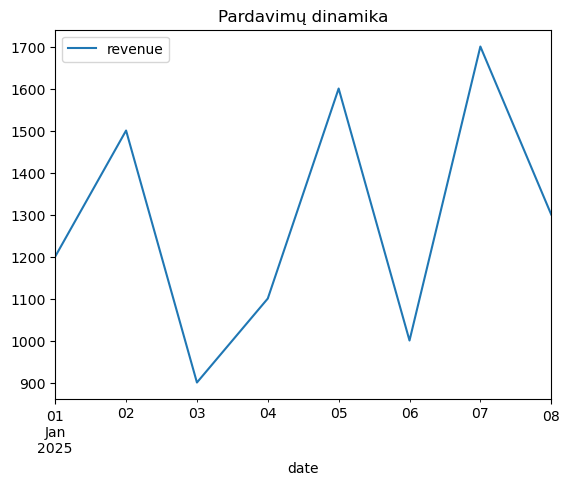

In [15]:
sales.plot(x="date", y="revenue")
plt.title("Pardavimų dinamika")
plt.savefig("sales_trend.png", dpi=150, bbox_inches="tight")
plt.show()


## 9. Dažnos klaidos ir gerosios praktikos (santrauka)

Dažnos klaidos:
- piešti grafikus be pavadinimų ir ašių aprašų
- naudoti per daug skirtingų grafikų tipų be aiškaus tikslo
- naudoti pie chart ten, kur reikia tikslaus palyginimo
- kurti per sudėtingus subplots

Gerosios praktikos:
- pasirinkti grafiką pagal klausimą, o ne pagal grožį
- naudoti `plot()` kaip greitą analizės priemonę
- išlaikyti nuoseklią vizualinę logiką
- išsaugoti grafikus, kai jie naudojami ataskaitose ar pristatymuose
